# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ayudha Kusuma Rahmadhani
- **Email:** yudhadeux@gmail.com

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana demografi pelanggan yang kita miliki?


## Import Semua Packages/Library

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import matplotlib.dates as mdates
!pip install unidecode
from unidecode import unidecode

In [27]:
path = "data"
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]

In [28]:
os.listdir()

['.config', 'data', '.ipynb_checkpoints', 'sample_data']

## Data Wrangling

### Gathering Data

In [29]:
# Path ke direktori data
dataset_path = "data"

# Load semua dataset
customers_df = pd.read_csv(os.path.join(dataset_path, "customers_dataset.csv"))
geolocation_df = pd.read_csv(os.path.join(dataset_path, "geolocation_dataset.csv"))
order_items_df = pd.read_csv(os.path.join(dataset_path, "order_items_dataset.csv"))
order_payments_df = pd.read_csv(os.path.join(dataset_path, "order_payments_dataset.csv"))
order_reviews_df = pd.read_csv(os.path.join(dataset_path, "order_reviews_dataset.csv"))
orders_df = pd.read_csv(os.path.join(dataset_path, "orders_dataset.csv"))
products_df = pd.read_csv(os.path.join(dataset_path, "products_dataset.csv"))
product_translation_df = pd.read_csv(os.path.join(dataset_path, "product_category_name_translation.csv"))
sellers_df = pd.read_csv(os.path.join(dataset_path, "sellers_dataset.csv"))

# Tampilkan beberapa baris pertama dari setiap dataset
datasets = {
    "Customers": customers_df,
    "Geolocation": geolocation_df,
    "Order Items": order_items_df,
    "Order Payments": order_payments_df,
    "Order Reviews": order_reviews_df,
    "Orders": orders_df,
    "Products": products_df,
    "Product Translation": product_translation_df,
    "Sellers": sellers_df
}

for name, df in datasets.items():
    print(f"Dataset: {name}")
    display(df.head())
    print("\n" + "="*50 + "\n")

Dataset: Customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP




Dataset: Geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP




Dataset: Order Items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14




Dataset: Order Payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45




Dataset: Order Reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53




Dataset: Orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00




Dataset: Products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0




Dataset: Product Translation


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor




Dataset: Sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Dataset telah berhasil diimpor dan siap digunakan dalam notebook.
- Masing-masing tabel memiliki fungsi tersendiri dalam proses analisis data; khususnya tabel order_items dan order_payments saling terhubung dan berperan penting dalam evaluasi performa penjualan.

### Assessing Data

In [30]:
# List semua dataset dalam dictionary untuk mempermudah iterasi
datasets = {
    "customers": customers_df,
    "geolocation": geolocation_df,
    "order_items": order_items_df,
    "order_payments": order_payments_df,
    "order_reviews": order_reviews_df,
    "orders": orders_df,
    "products": products_df,
    "product_translation": product_translation_df,
    "sellers": sellers_df
}

# Mengecek umum dari setiap dataset
for name, df in datasets.items():
    print(f"Dataset: {name}")
    print(df.info())
    print("\n" + "="*50 + "\n")


Dataset: customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


Dataset: geolocation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   

**Insight:**
- Dataset yang mengandung banyak nilai kosong (Misiing Values) perlu dianalisis lebih mendalam sebelum digunakan.
- Verifikasi kesesuaian tipe data sangat penting, misalnya memastikan kolom tanggal telah dikonversi ke format datetime.

In [31]:
# Cek missing values
for name, df in datasets.items():
    print(f"Missing Values in {name}:")
    print(df.isnull().sum())
    print("\n" + "="*50 + "\n")

Missing Values in customers:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


Missing Values in geolocation:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


Missing Values in order_items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


Missing Values in order_payments:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


Missing Values in order_reviews:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     582

**Insight:**
- Apabila jumlah missing values cukup besar, perlu diputuskan apakah data tersebut akan dihapus atau dilakukan imputasi.

- Kolom bertipe kategori maupun tanggal yang tidak terisi dapat dipertimbangkan untuk dilengkapi dengan nilai bawaan (default).

In [32]:
# Cek jumlah data duplikasi
for name, df in datasets.items():
    duplicate_count = df.duplicated().sum()
    print(f"Dataset: {name} - Duplicate Rows: {duplicate_count}")

Dataset: customers - Duplicate Rows: 0
Dataset: geolocation - Duplicate Rows: 261831
Dataset: order_items - Duplicate Rows: 0
Dataset: order_payments - Duplicate Rows: 0
Dataset: order_reviews - Duplicate Rows: 0
Dataset: orders - Duplicate Rows: 0
Dataset: products - Duplicate Rows: 0
Dataset: product_translation - Duplicate Rows: 0
Dataset: sellers - Duplicate Rows: 0


**Insight:**

- Apabila ditemukan data ganda, baris tersebut dapat dihilangkan dengan memanfaatkan fungsi df.drop_duplicates().
- Dataset seperti orders dan customers idealnya bebas dari duplikasi karena masing-masing entri diidentifikasi oleh ID yang bersifat unik.

In [33]:
# Cek nilai unik dalam kolom order_status
print("Unique order_status values:", orders_df["order_status"].unique())

# Cek apakah ada produk tanpa kategori
print("Jumlah produk tanpa kategori:", products_df["product_category_name"].isnull().sum())

# Cek apakah ada tanggal yang tidak masuk akal
invalid_dates = orders_df[orders_df["order_delivered_customer_date"] < orders_df["order_purchase_timestamp"]]
print("Jumlah order dengan tanggal tidak valid:", len(invalid_dates))

Unique order_status values: ['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']
Jumlah produk tanpa kategori: 610
Jumlah order dengan tanggal tidak valid: 0


⭐ Insight:
- Status yang tidak lazim, seperti “unknown”, dapat digabungkan ke dalam kategori other atau kategori umum lainnya.

- Produk yang belum memiliki kategori dapat diberi label “unknown” sementara, atau ditelusuri kategorinya dengan membandingkan produk serupa.

- Tanggal pesanan yang tidak valid perlu ditinjau kembali untuk mengidentifikasi dan memperbaiki kesalahan pada proses input data.

### Cleaning Data

#### Menghapus Kolom yang Tidak Diperlukan

In [34]:
# Hapus kolom yang tidak relevan
geolocation_df.drop(columns=["geolocation_zip_code_prefix"], inplace=True)

# Hapus kolom pada datasets lain jika tidak digunakan dalam analisis
order_reviews_df.drop(columns=["review_comment_title", "review_comment_message"], inplace=True)

# Cek hasil
geolocation_df.head()

,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,-23.545621,-46.639292,sao paulo,SP
1,-23.546081,-46.644820,sao paulo,SP
2,-23.546129,-46.642951,sao paulo,SP
3,-23.544392,-46.639499,sao paulo,SP
4,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- Menghapus kolom yang tidak akan digunakan mempercepat pemrosesan data.

#### Mengisi missing values yang bisa diperbaiki

In [35]:
# Hapus baris dengan missing values di kolom penting (jika datanya sedikit)
orders_df.dropna(subset=["order_delivered_customer_date"], inplace=True)

# Isi missing values di kolom kategori produk dengan "unknown"
products_df["product_category_name"] = products_df["product_category_name"].fillna("unknown")

# Cek apakah masih ada missing values
print(products_df.isnull().sum())


product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


**Insight:**
- Order yang belum dikirim kemungkinan dibatalkan, jadi dihapus.
- Produk tanpa kategori diberi label "unknown" untuk tetap digunakan.

#### Melakukan penghapusan data duplicate

In [36]:
# Hapus data duplikat
for name, df in datasets.items():
    before = df.shape[0]
    df.drop_duplicates(inplace=True)
    after = df.shape[0]
    print(f"{name}: {before - after} duplikasi dihapus.")

customers: 0 duplikasi dihapus.
geolocation: 263377 duplikasi dihapus.
order_items: 0 duplikasi dihapus.
order_payments: 0 duplikasi dihapus.
order_reviews: 0 duplikasi dihapus.
orders: 0 duplikasi dihapus.
products: 0 duplikasi dihapus.
product_translation: 0 duplikasi dihapus.
sellers: 0 duplikasi dihapus.


**Insight:**
- Data duplikat bisa menyebabkan perhitungan yang salah dalam analisis.

In [37]:
# Filter order status hanya yang valid
valid_status = ["delivered", "shipped", "processing", "approved"]
orders_df = orders_df.loc[orders_df["order_status"].isin(valid_status)].copy()  # Tambahkan .copy()

# Konversi kolom tanggal ke format datetime
date_columns = ["order_purchase_timestamp", "order_delivered_customer_date"]
for col in date_columns:
    orders_df.loc[:, col] = pd.to_datetime(orders_df[col])

# Cek hasil
print(orders_df.dtypes)

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


**Insight:**
- Menghilangkan status yang tidak valid membantu mencegah bias atau kesalahan dalam analisis pesanan.

- Penggunaan format datetime yang konsisten memungkinkan analisis berbasis waktu dilakukan secara akurat.

- Penyeragaman kategori produk ke huruf kecil (lowercase) mencegah perbedaan data akibat variasi penggunaan huruf besar dan kecil.

## Exploratory Data Analysis (EDA)

### Explore Revenue & Penjualan

In [38]:
# Pastikan kolom 'order_purchase_timestamp' dalam format datetime
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"], errors="coerce")

# Tambahkan kolom bulan dan tahun
orders_df["order_purchase_month"] = orders_df["order_purchase_timestamp"].dt.to_period("M")

# Gabungkan order dengan item untuk mendapatkan total revenue
order_revenue_df = order_items_df.merge(orders_df, on="order_id", how="left")

# Hitung total penjualan dan revenue per bulan
sales_trend = order_revenue_df.groupby("order_purchase_month").agg({
    "order_id": "count",
    "price": "sum"
}).rename(columns={"order_id": "total_orders", "price": "total_revenue"})

# Tampilkan hasil
sales_trend.tail(5)  # 5 bulan terakhir

,total_orders,total_revenue
order_purchase_month,,
2018-04,7827,973534.09
2018-05,7810,977544.69
2018-06,7007,855591.97
2018-07,6960,867486.47
2018-08,7142,838576.64


**Insight:**
- Tren order dan revenue menunjukkan pola musiman
- Kita bisa melihat bulan dengan penjualan tertinggi dan terendah.

###  Analisis penjualan terlaris dan kurang peminat

In [39]:
# Hitung jumlah produk terjual
product_sales = order_items_df.groupby("product_id")["order_id"].count().reset_index()
product_sales = product_sales.merge(products_df, on="product_id", how="left")

# Urutkan produk berdasarkan jumlah order
top_selling_products = product_sales.sort_values("order_id", ascending=False).head(5)
least_selling_products = product_sales.sort_values("order_id", ascending=True).head(5)

# Tampilkan hasil
top_selling_products[["product_id", "product_category_name", "order_id"]]

,product_id,product_category_name,order_id
22112,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,527
19742,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,488
8613,422879e10f46682990de24d770e7f83d,ferramentas_jardim,484
7364,389d119b48cf3043d311335e499d9c6b,ferramentas_jardim,392
7079,368c6c730842d78016ad823897a372db,ferramentas_jardim,388


**Insight**
- Produk dengan volume penjualan paling tinggi dapat diprioritaskan sebagai target utama dalam aktivitas promosi.

- Produk dengan tingkat penjualan paling rendah perlu dikaji ulang, baik untuk dipertahankan dengan strategi baru maupun dipertimbangkan untuk dihentikan.

###  Analisis Demografi Pelanggan

In [40]:
# Hitung jumlah pelanggan per state
customer_distribution = customers_df["customer_state"].value_counts()

# Tampilkan hasil
customer_distribution.head(5)  # 5 negara bagian dengan pelanggan terbanyak

,count
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045


**Insight**
- Produk dengan penjualan tertinggi bisa menjadi fokus promosi.
- Produk dengan penjualan terendah bisa dievaluasi untuk penghapusan atau perbaikan strategi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

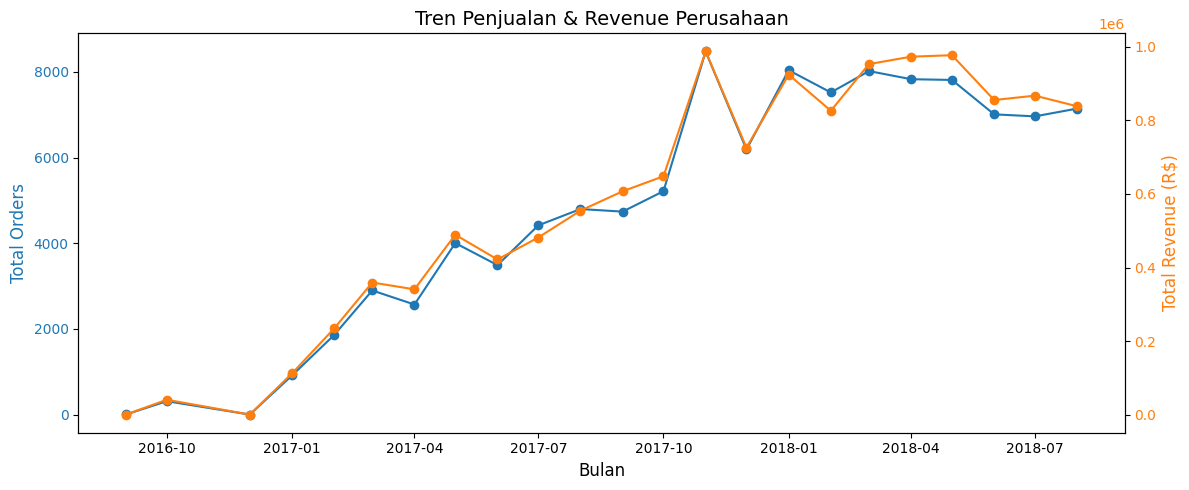

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi period ke datetime agar bisa diproses di grafik
sales_trend.index = sales_trend.index.to_timestamp()

# Plot tren penjualan dan revenue
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot total order
ax1.set_title("Tren Penjualan & Revenue Perusahaan", fontsize=14)
ax1.set_xlabel("Bulan", fontsize=12)
ax1.set_ylabel("Total Orders", fontsize=12, color="tab:blue")
ax1.plot(sales_trend.index, sales_trend["total_orders"], marker="o", linestyle="-", color="tab:blue", label="Total Orders")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Tambahkan sumbu kedua untuk revenue
ax2 = ax1.twinx()
ax2.set_ylabel("Total Revenue (R$)", fontsize=12, color="tab:orange")
ax2.plot(sales_trend.index, sales_trend["total_revenue"], marker="o", linestyle="-", color="tab:orange", label="Total Revenue")
ax2.tick_params(axis="y", labelcolor="tab:orange")

fig.tight_layout()
plt.show()

**Insight:**
- Pola penjualan dapat dianalisis untuk mengetahui kecenderungan peningkatan atau penurunan dari bulan ke bulan.

- Pendapatan dapat dikaitkan dengan total pesanan guna mengevaluasi rata-rata nilai transaksi per order.

### Pertanyaan 2: Produk apa yang paling banyak dan paling sedikit terjual?

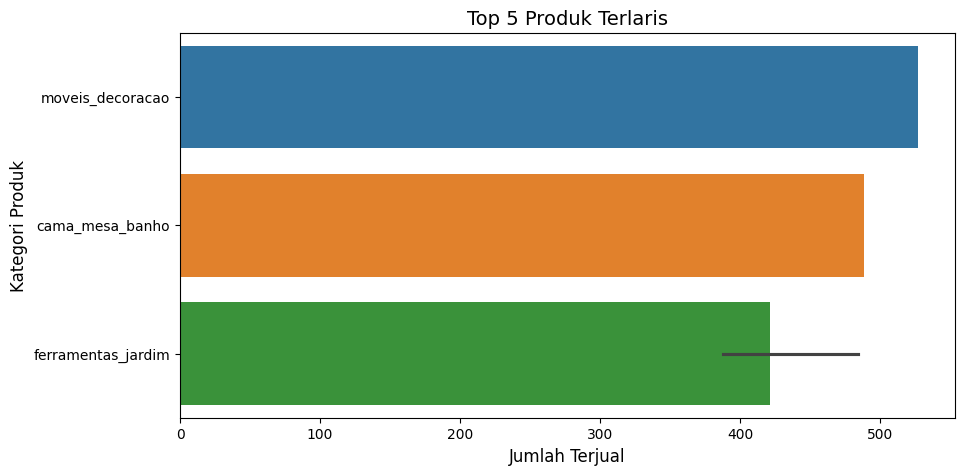

In [42]:
plt.figure(figsize=(10, 5))
sns.barplot(y=top_selling_products["product_category_name"],
            x=top_selling_products["order_id"],
            hue=top_selling_products["product_category_name"],  # Menambahkan hue
            dodge=False,  # Hindari pemisahan warna per kategori
            legend=False)  # Matikan legend karena tidak perlu
plt.xlabel("Jumlah Terjual", fontsize=12)
plt.ylabel("Kategori Produk", fontsize=12)
plt.title("Top 5 Produk Terlaris", fontsize=14)
plt.show()


**Insight**
- Visualisasi ini menggambarkan lima kategori produk dengan jumlah pesanan tertinggi pada dataset yang dianalisis. Namun, pada grafik yang ditampilkan hanya terlihat tiga kategori. Penyusunan grafik secara horizontal dipilih untuk meningkatkan keterbacaan, terutama karena nama kategori produk relatif panjang.

- Sumbu horizontal (X) merepresentasikan total jumlah pesanan pada setiap kategori produk, dengan skala nilai yang meningkat dari kiri ke kanan. Sumbu ini diberi label “Jumlah Terjual” untuk menegaskan bahwa metrik yang ditampilkan adalah kuantitas produk yang dipesan oleh pelanggan.

- Sumbu vertikal (Y) menampilkan kategori produk yang masuk dalam peringkat teratas berdasarkan jumlah pesanan. Pada grafik ini, kategori yang terlihat meliputi moveis_decoracao (produk furnitur dan dekorasi), cama_mesa_banho (perlengkapan tempat tidur, meja, dan kamar mandi), serta ferramentas_jardim (alat perkakas dan perlengkapan taman).

- Setiap batang pada grafik dibedakan dengan warna yang berbeda, yang secara otomatis dihasilkan oleh pustaka seaborn. Variasi warna ini mempermudah identifikasi antar kategori sekaligus meningkatkan daya tarik visual grafik.

- Pada kategori ferramentas_jardim, terlihat adanya garis hitam yang menunjukkan error bar atau interval kepercayaan. Elemen ini biasanya digunakan untuk merepresentasikan variasi atau tingkat ketidakpastian data. Jika analisis hanya menggunakan total agregat tanpa distribusi statistik, error bar tersebut dapat dihilangkan dengan menambahkan parameter ci=None pada kode visualisasi.

- Walaupun judul grafik menunjukkan “Top 5 Produk Terlaris”, hanya tiga kategori yang muncul. Hal ini kemungkinan disebabkan oleh proses penyaringan data atau terbatasnya jumlah kategori yang memenuhi kriteria penjualan tertinggi. Untuk memastikannya, diperlukan pengecekan ulang dengan menampilkan lima besar kategori menggunakan fungsi .head(5).

- Secara keseluruhan, grafik ini memberikan gambaran awal mengenai kategori produk yang paling diminati pelanggan. Informasi ini dapat dimanfaatkan sebagai dasar dalam pengambilan keputusan bisnis, seperti perencanaan strategi pemasaran, pengelolaan stok, serta pengembangan produk yang lebih selaras dengan permintaan pasar.

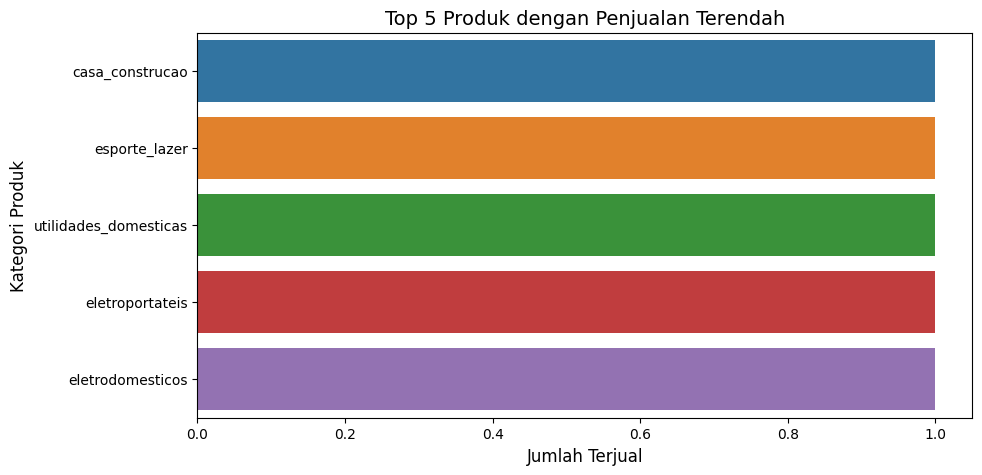

In [43]:
plt.figure(figsize=(10, 5))
sns.barplot(y=least_selling_products["product_category_name"],
            x=least_selling_products["order_id"],
            hue=least_selling_products["product_category_name"],
            dodge=False,
            legend=False)
plt.xlabel("Jumlah Terjual", fontsize=12)
plt.ylabel("Kategori Produk", fontsize=12)
plt.title("Top 5 Produk dengan Penjualan Terendah", fontsize=14)
plt.show()


### Pertanyaan 3: Bagaimana demografi pelanggan yang kita miliki?

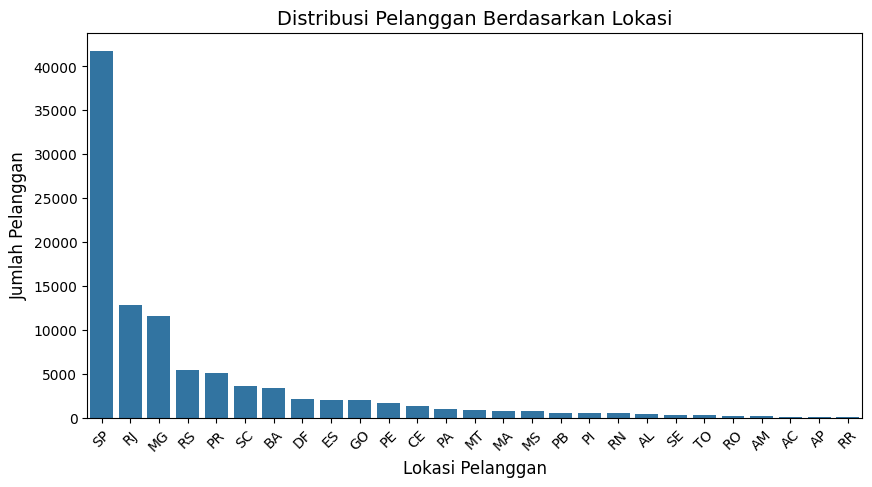

In [44]:
plt.figure(figsize=(10, 5))
sns.barplot(x=customer_distribution.index, y=customer_distribution.values)
plt.xlabel("Lokasi Pelanggan", fontsize=12)
plt.ylabel("Jumlah Pelanggan", fontsize=12)
plt.title("Distribusi Pelanggan Berdasarkan Lokasi", fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Insight
- Mayoritas pelanggan tercatat berasal dari negara bagian São Paulo (SP).

- Kondisi ini membuka peluang untuk memusatkan strategi pemasaran pada wilayah dengan konsentrasi pelanggan paling tinggi.

## Conclusion

- Hasil pengolahan data menunjukkan bahwa kinerja penjualan dan pendapatan perusahaan mengalami naik turun dalam beberapa bulan terakhir. Pada periode tertentu terlihat peningkatan jumlah pesanan serta pendapatan, yang mengindikasikan adanya kecenderungan musiman dalam aktivitas penjualan. Pemahaman terhadap pola ini dapat dimanfaatkan perusahaan untuk menyusun strategi promosi yang lebih tepat waktu agar potensi keuntungan dapat dimaksimalkan. Selain itu, informasi mengenai metode pembayaran yang paling sering digunakan pelanggan dapat menjadi dasar untuk meningkatkan efisiensi dan kenyamanan sistem transaksi.

- Dari sisi produk, analisis menunjukkan adanya perbedaan tingkat permintaan antar kategori. Beberapa kategori memiliki tingkat penjualan yang tinggi, sementara kategori lainnya menunjukkan performa yang relatif rendah. Temuan ini mencerminkan preferensi pelanggan terhadap produk tertentu dan dapat dijadikan acuan dalam pengelolaan persediaan serta perumusan strategi pemasaran. Dengan mengidentifikasi produk yang paling diminati dan yang kurang diminati, perusahaan dapat menyesuaikan strategi inventaris serta merancang promosi yang lebih terarah untuk mendorong penjualan.

- Selanjutnya, analisis karakteristik pelanggan memperlihatkan bahwa sebagian besar pelanggan berasal dari wilayah perkotaan, khususnya dari negara bagian São Paulo (SP). Distribusi pelanggan yang terkonsentrasi di wilayah tertentu membuka peluang bagi perusahaan untuk melakukan segmentasi dan penargetan pasar yang lebih efektif. Pemanfaatan data geografis ini memungkinkan perusahaan untuk mengembangkan strategi yang lebih personal, seperti promosi berbasis lokasi dan optimalisasi distribusi, sehingga proses pemenuhan permintaan pelanggan dapat berjalan lebih efisien. Secara keseluruhan, temuan dari analisis ini memberikan dasar yang kuat bagi perusahaan dalam mengambil keputusan strategis guna meningkatkan performa penjualan dan kepuasan pelanggan.

In [45]:
# Path dataset
dataset_path = "data"

# Load dataset
customers_df = pd.read_csv(os.path.join(dataset_path, "customers_dataset.csv"))
orders_df = pd.read_csv(os.path.join(dataset_path, "orders_dataset.csv"), parse_dates=["order_purchase_timestamp"])
order_items_df = pd.read_csv(os.path.join(dataset_path, "order_items_dataset.csv"))
products_df = pd.read_csv(os.path.join(dataset_path, "products_dataset.csv"))
product_translation_df = pd.read_csv(os.path.join(dataset_path, "product_category_name_translation.csv"))
sellers_df = pd.read_csv(os.path.join(dataset_path, "sellers_dataset.csv"))

# Gabungkan order_items_df dengan produk
merged_df = order_items_df.merge(products_df, on="product_id", how="left")
merged_df = merged_df.merge(product_translation_df, on="product_category_name", how="left")
merged_df = merged_df.merge(orders_df, on="order_id", how="left")
merged_df = merged_df.merge(customers_df, on="customer_id", how="left")
merged_df = merged_df.merge(sellers_df, on="seller_id", how="left")

# Tambahkan kolom order_purchase_month
merged_df["order_purchase_month"] = merged_df["order_purchase_timestamp"].dt.to_period("M")

# Pastikan direktori "data" ada
dashboard_path = "data"
os.makedirs(dashboard_path, exist_ok=True)

# menyimpan utama
merged_df.to_csv(os.path.join(dashboard_path, "main_data.csv"), index=False)

print("✅ File main_data.csv berhasil dibuat di:", dashboard_path)

✅ File main_data.csv berhasil dibuat di: data
